### Telco Customer Churn Classification Project - rough draft

In [1]:
# bring in my imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from scipy import stats
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from env import host, user, password


import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

# Plan -> Acquire -> Prepare -> Explore -> Model & Evaluate -> Deliver

## Acquire my data

In [2]:
# now we've done everything manually, let's combine and create functions
# create helper function
def get_connection(db_name):
    '''
    This function uses my info from my env file to
    create a connection url to access the sql database.
    '''
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{db_name}'

In [3]:
# create my function for my sql query
def get_new_telco_churn_data():
    '''
    This function reads in the telco churn data from the sql database
    and returns a pandas DataFrame with all columns.
    '''
    sql_query = '''
    SELECT *
    FROM payment_types
    JOIN customers ON payment_types.payment_type_id = customers.payment_type_id
    JOIN internet_service_types ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
    JOIN contract_types ON contract_types.contract_type_id = customers.contract_type_id;
    '''
    return pd.read_sql(sql_query, get_connection('telco_churn'))

In [4]:
df = get_new_telco_churn_data()

In [5]:
df.sample(5)

,payment_type_id,payment_type,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,internet_service_type_id,internet_service_type,contract_type_id,contract_type
540,2,Mailed check,0111-KLBQG,Male,1,Yes,Yes,32,Yes,No,...,1,Yes,2,93.95,2861.45,No,2,Fiber optic,1,Month-to-month
5598,2,Mailed check,3774-VBNXY,Female,0,Yes,Yes,64,Yes,No,...,3,No,2,20.20,1277.75,No,3,None,3,Two year
5048,4,Credit card (automatic),4776-XSKYQ,Female,0,Yes,Yes,12,No,No phone service,...,2,No,4,30.25,368.85,No,1,DSL,2,One year
669,2,Mailed check,0641-EVBOJ,Male,0,No,No,3,Yes,No,...,1,Yes,2,82.30,214.4,No,2,Fiber optic,1,Month-to-month
4890,4,Credit card (automatic),2065-MMKGR,Female,0,No,No,29,Yes,Yes,...,2,Yes,4,71.00,2080.1,No,1,DSL,2,One year


In [6]:
df.shape

(7043, 27)

### New Functions

In [7]:
df = acquire.get_new_telco_churn_data()
churned_df = df[df['churn']=='Yes']

In [8]:
df.sample(5).T

,2316,7040,7025,5448,2616
payment_type_id,1,2,1,2,4
payment_type,Electronic check,Mailed check,Electronic check,Mailed check,Credit card (automatic)
customer_id,8380-PEFPE,9928-BZVLZ,9769-TSBZE,1574-DYCWE,9850-OWRHQ
gender,Male,Female,Female,Female,Female
senior_citizen,0,0,0,0,0
partner,No,No,No,Yes,Yes
dependents,Yes,No,Yes,Yes,No
tenure,1,12,70,51,3
phone_service,Yes,No,Yes,Yes,Yes
multiple_lines,No,No phone service,Yes,No,Yes


In [9]:
churned_df.sample().T

,1513
payment_type_id,1
payment_type,Electronic check
customer_id,4587-VVTOX
gender,Female
senior_citizen,0
partner,Yes
dependents,No
tenure,6
phone_service,Yes
multiple_lines,Yes


In [10]:
# value counts on my churned data frame

columns = ['payment_type', 'gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'multiple_lines', 
           'online_security', 'online_backup', 'device_protection', 'tech_support',
          'streaming_tv', 'streaming_movies', 'paperless_billing',
          'monthly_charges', 'total_charges', 'churn', 'internet_service_type', 'contract_type']

for col in columns:
    print(col)
    print(churned_df[col].value_counts())
    print('-------------')

payment_type
Electronic check             1071
Mailed check                  308
Bank transfer (automatic)     258
Credit card (automatic)       232
Name: payment_type, dtype: int64
-------------
gender
Female    939
Male      930
Name: gender, dtype: int64
-------------
senior_citizen
0    1393
1     476
Name: senior_citizen, dtype: int64
-------------
partner
No     1200
Yes     669
Name: partner, dtype: int64
-------------
dependents
No     1543
Yes     326
Name: dependents, dtype: int64
-------------
phone_service
Yes    1699
No      170
Name: phone_service, dtype: int64
-------------
multiple_lines
Yes                 850
No                  849
No phone service    170
Name: multiple_lines, dtype: int64
-------------
online_security
No                     1461
Yes                     295
No internet service     113
Name: online_security, dtype: int64
-------------
online_backup
No                     1233
Yes                     523
No internet service     113
Name: online_backup,

### What are my takeaways?
- Right off the bat I can see which columns have an obvious association to churn:
 - contract_type/contract_type_id
 - internet_service_type/internet_service_type_id
 - paperless billing
 - tech_support
 - device_protection
 - online_backup
 - online security
 - phone_service
 - dependents
 - partner
 - senior_citizen
 - payment_type/paymnent_type_id
 
----------------
 
- Things to investigate further:
 - Is there an association with total charges?
 - Is there an association with monthly charges?
 - Is there an association with tenure?
 
----------------
 
- We don't care too much about:
 - streaming_movies
 - streaming_tv
 - multiple_lines
 - gender

In [11]:
# make a df just for churned customers so we can hone in on a drive
churned_df = df[df['churn']=='Yes']

## Combine everything into functions

In [12]:
def prep_telco_data(df):
    '''
    This function prepares and cleans the telco dataframe imported from sql.
    '''
#     df = acquire.get_new_telco_churn_data()

    # get rid of duplicate columns from the sql join
    df = df.loc[:, ~df.columns.duplicated()]

    # this is to adress the blank in total_charges. Here we replace the blank with a nan, and then drop our nulls
    df = df.replace(' ', np.nan)
    df.dropna(inplace=True)
    # change our total_charges from a string to a float
    df.total_charges = df.total_charges.astype('float')
    
    # drop the columns that do not appear to have any association to churn
    df = df.drop(columns=['streaming_movies', 'streaming_tv', 'multiple_lines', 'gender',
                         'contract_type_id', 'internet_service_type_id', 'payment_type_id'])
    
    # rename my tenure column
    df = df.rename(columns={'tenure': 'tenure_in_months'})

    # this change all of my yes and no columns to binary columns
    columns = ['partner', 'dependents', 'phone_service', 'online_security', 'online_backup', 
               'device_protection', 'tech_support', 'paperless_billing', 'churn']

    for cols in columns:
        df[cols] = np.where(df[cols] == 'Yes', 1, 0)

    return df



def create_dummies(df):
    '''
    This function is used to create dummy columns for my non binary columns
    '''
    
    # create dummies for payment_type, internet_service_type, and contract_type
    payment_dummies = pd.get_dummies(df.payment_type, drop_first=True)
    internet_dummies = pd.get_dummies(df.internet_service_type, drop_first=False)
    contract_dummies = pd.get_dummies(df.contract_type, drop_first=True)
    
    # now we concatenate our dummy dataframes with the original
    df = pd.concat([df, payment_dummies, internet_dummies, contract_dummies], axis=1)
    
    # now I am dropping all my original string columns that I made dummies with and dropping 
    #the type_id columns since they are duplicates of the string column
    df = df.drop(columns=['None', 'payment_type', 'contract_type', 'internet_service_type'])
    
    return df


def telco_split(df):
    '''
    This function takes in a dataframe and splits it into train, test, and validate dataframes for my model
    '''

    train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=123)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=123)
    return train, validate, test
    

In [13]:
df = prepare.prep_telco_data(df)

In [14]:
df.sample().T

,2779
payment_type,Mailed check
customer_id,1205-WNWPJ
senior_citizen,0
partner,0
dependents,0
tenure_in_months,7
phone_service,1
online_security,0
online_backup,0
device_protection,0


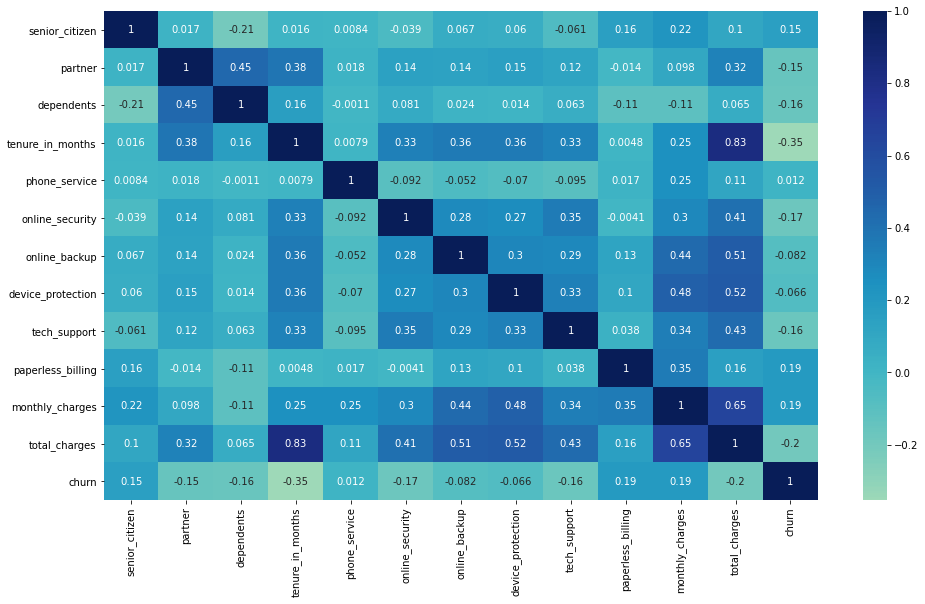

In [15]:
plt.figure(figsize=(16, 9))
sns.heatmap(((df.corr())), cmap='YlGnBu', center=0, annot=True)

plt.title('')
plt.show()

In [16]:
correl = df.corr()
correl.T

,senior_citizen,partner,dependents,tenure_in_months,phone_service,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn
senior_citizen,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.156258,0.219874,0.102411,0.150541
partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.143346,0.141849,0.153556,0.120206,-0.013957,0.097825,0.319072,-0.149982
dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.110131,-0.112343,0.064653,-0.163128
tenure_in_months,0.015683,0.381912,0.163386,1.000000,0.007877,0.328297,0.361138,0.361520,0.325288,0.004823,0.246862,0.825880,-0.354049
phone_service,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,0.016696,0.248033,0.113008,0.011691
online_security,-0.038576,0.143346,0.080786,0.328297,-0.091676,1.000000,0.283285,0.274875,0.354458,-0.004051,0.296447,0.412619,-0.171270
online_backup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.283285,1.000000,0.303058,0.293705,0.127056,0.441529,0.510100,-0.082307
device_protection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.274875,0.303058,1.000000,0.332850,0.104079,0.482607,0.522881,-0.066193
tech_support,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.354458,0.293705,0.332850,1.000000,0.037536,0.338301,0.432868,-0.164716
paperless_billing,0.156258,-0.013957,-0.110131,0.004823,0.016696,-0.004051,0.127056,0.104079,0.037536,1.000000,0.351930,0.157830,0.191454


Text(0.5, 1.0, 'Feautures  Correlating with Churn')

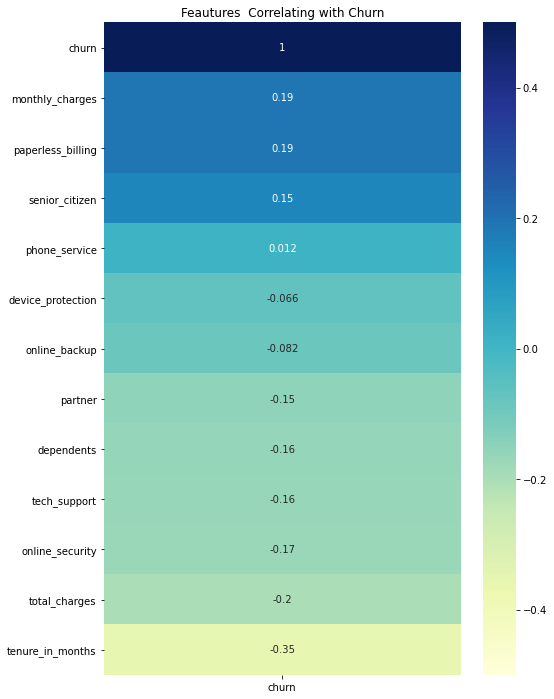

In [17]:
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='YlGnBu', vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures  Correlating with Churn')

In [18]:
churned_df = df[df['churn']==1]
churned_df.sample(3).T

,3502,6280,1978
payment_type,Mailed check,Bank transfer (automatic),Electronic check
customer_id,6905-NIQIN,6990-YNRIO,6689-TCZHQ
senior_citizen,0,0,1
partner,0,1,0
dependents,0,1,0
tenure_in_months,1,65,5
phone_service,1,1,1
online_security,0,1,0
online_backup,1,0,0
device_protection,0,1,0


# EXPLORE

In [19]:
#  Is there an association with monthly charges?
df.monthly_charges.mean(), churned_df.monthly_charges.mean()

(64.79820819112616, 74.44133226324224)

Text(0, 0.5, 'amount of customers')

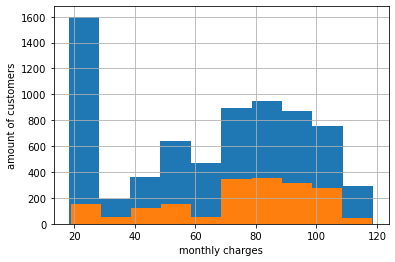

In [20]:
# churned customers pay more monthly charges than overall customers
df.monthly_charges.hist()
churned_df.monthly_charges.hist()
plt.xlabel('monthly charges')
plt.ylabel('amount of customers')

In [21]:
df.total_charges.mean(), churned_df.total_charges.mean()

(2283.300440841863, 1531.7960941680042)

Text(0, 0.5, 'amount of customers')

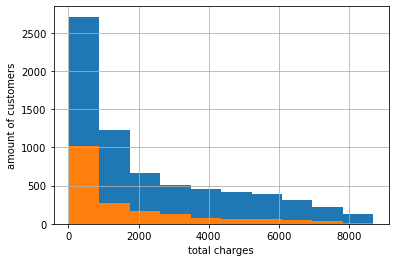

In [22]:
# comparison of total charges
df.total_charges.hist()
churned_df.total_charges.hist()
plt.xlabel('total charges')
plt.ylabel('amount of customers')

Text(0, 0.5, 'amount of customers')

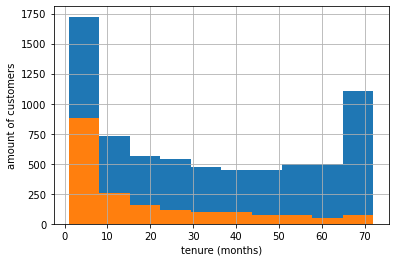

In [23]:
# comparison of tenure
df.tenure_in_months.hist()
churned_df.tenure_in_months.hist()
plt.xlabel('tenure (months)')
plt.ylabel('amount of customers')

In [24]:
# _, ax = plt.subplots(nrows=1, ncols=19, figsize=(16, 6))
# for i, column in enumerate(columns):
#     sns.barplot(column, 'churn', data=df, ax=ax[i], alpha=0.5)
#     plt.show()

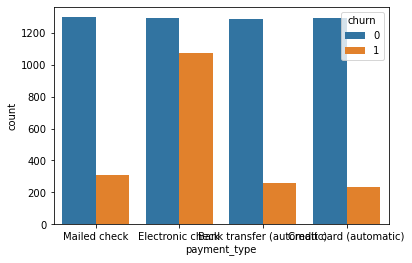

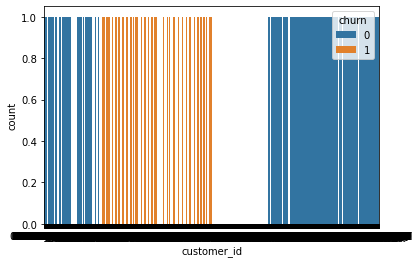

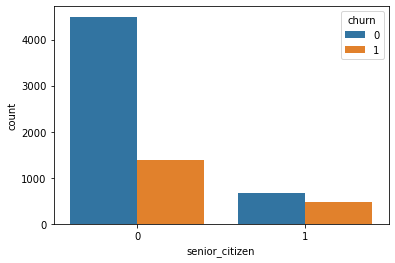

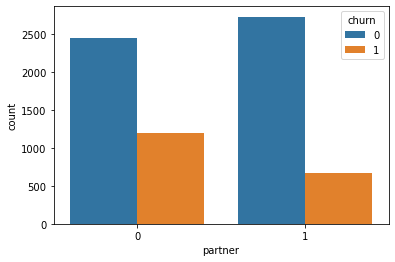

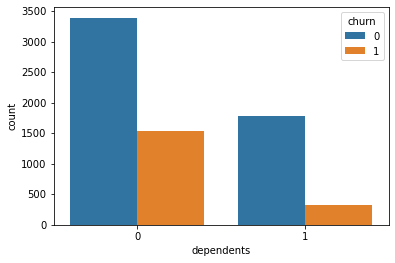

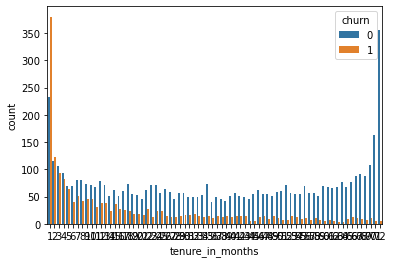

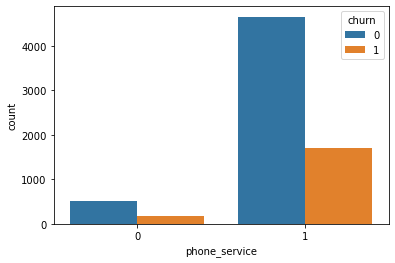

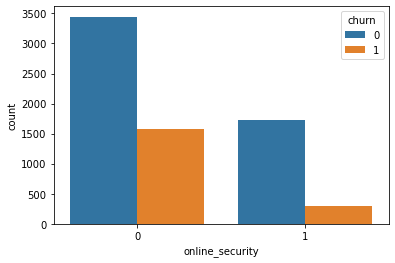

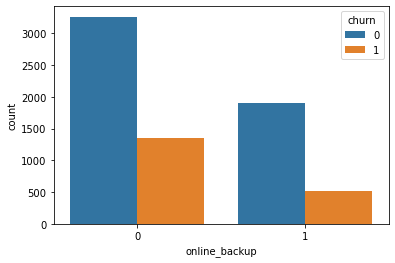

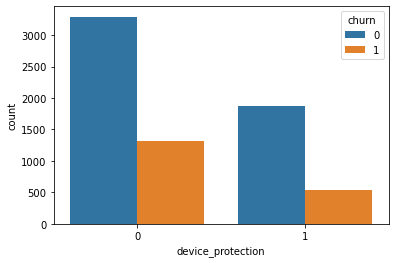

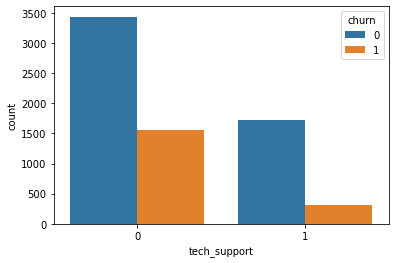

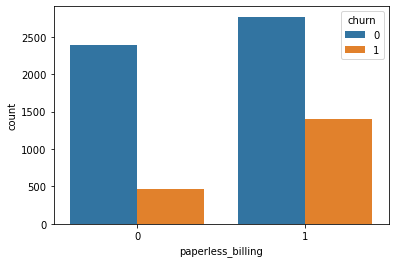

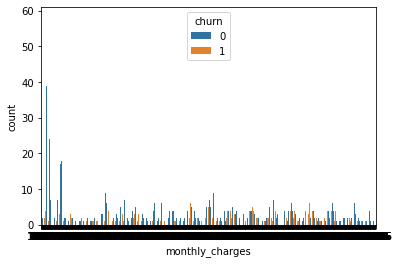

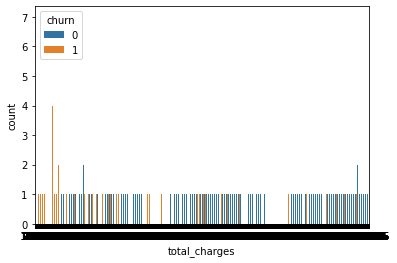

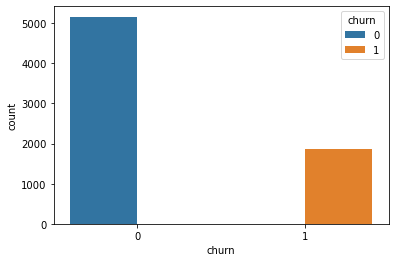

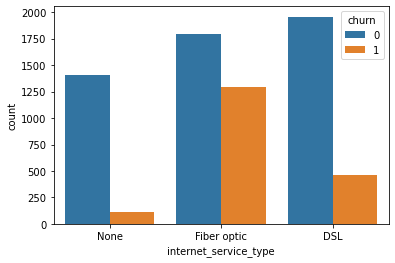

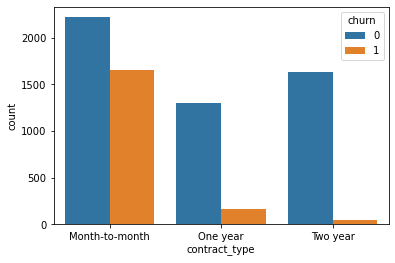

In [25]:
for i in df.columns:
    sns.countplot(data=df, x=i, hue='churn')
    plt.show()

<AxesSubplot:xlabel='churn', ylabel='count'>

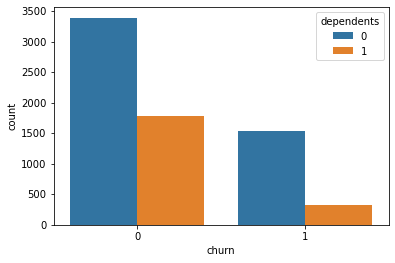

In [26]:
sns.countplot(x='churn', hue='dependents', data=df)

<AxesSubplot:xlabel='churn', ylabel='count'>

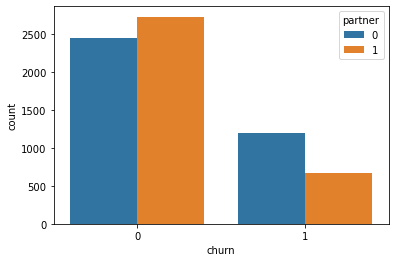

In [27]:
# partners don't play a part
sns.countplot(x='churn', hue='partner', data=df)

In [28]:
correl = df.corr()
correl.T

,senior_citizen,partner,dependents,tenure_in_months,phone_service,online_security,online_backup,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn
senior_citizen,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.156258,0.219874,0.102411,0.150541
partner,0.016957,1.000000,0.452269,0.381912,0.018397,0.143346,0.141849,0.153556,0.120206,-0.013957,0.097825,0.319072,-0.149982
dependents,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.110131,-0.112343,0.064653,-0.163128
tenure_in_months,0.015683,0.381912,0.163386,1.000000,0.007877,0.328297,0.361138,0.361520,0.325288,0.004823,0.246862,0.825880,-0.354049
phone_service,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,0.016696,0.248033,0.113008,0.011691
online_security,-0.038576,0.143346,0.080786,0.328297,-0.091676,1.000000,0.283285,0.274875,0.354458,-0.004051,0.296447,0.412619,-0.171270
online_backup,0.066663,0.141849,0.023639,0.361138,-0.052133,0.283285,1.000000,0.303058,0.293705,0.127056,0.441529,0.510100,-0.082307
device_protection,0.059514,0.153556,0.013900,0.361520,-0.070076,0.274875,0.303058,1.000000,0.332850,0.104079,0.482607,0.522881,-0.066193
tech_support,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.354458,0.293705,0.332850,1.000000,0.037536,0.338301,0.432868,-0.164716
paperless_billing,0.156258,-0.013957,-0.110131,0.004823,0.016696,-0.004051,0.127056,0.104079,0.037536,1.000000,0.351930,0.157830,0.191454


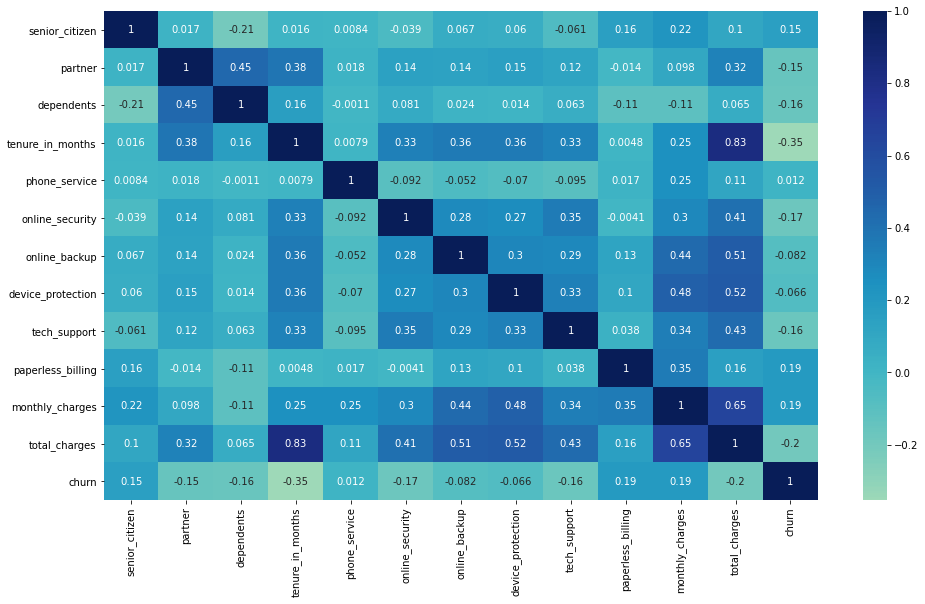

In [29]:
plt.figure(figsize=(16, 9))
sns.heatmap(((df.corr())), cmap='YlGnBu', center=0, annot=True)

plt.title('')
plt.show()

Text(0.5, 1.0, 'Feautures  Correlating with Churn')

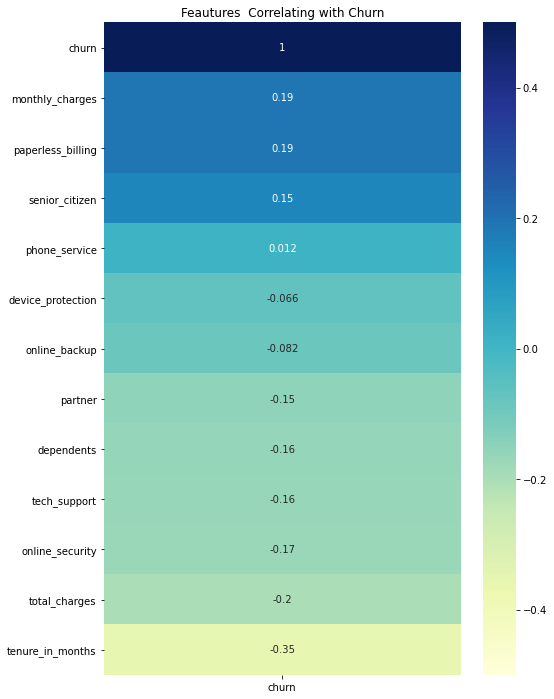

In [30]:
plt.figure(figsize=(8,12))
churn_heatmap = sns.heatmap(df.corr()[['churn']].sort_values(by='churn', ascending=False), cmap='YlGnBu', vmin=-.5, vmax=.5, annot=True)
churn_heatmap.set_title('Feautures  Correlating with Churn')

In [31]:
churned_df.sample().T

,2275
payment_type,Electronic check
customer_id,8111-SLLHI
senior_citizen,1
partner,1
dependents,0
tenure_in_months,39
phone_service,1
online_security,0
online_backup,1
device_protection,1


### Takeaways:
- Columns with obvious correlation:
 - payment_type
 - senior_citizen
 - contract_type
 - internet_service_type
 - dependents

Let's further explore other possible associations.

In [32]:
# oops we need to get our dummies now
# df = create_dummies(df)

In [33]:
# split my dad (should be done earlier for explore)
train, validate, test = prepare.telco_split(df)

In [34]:
train.shape, validate.shape, test.shape

((3937, 17), (1688, 17), (1407, 17))

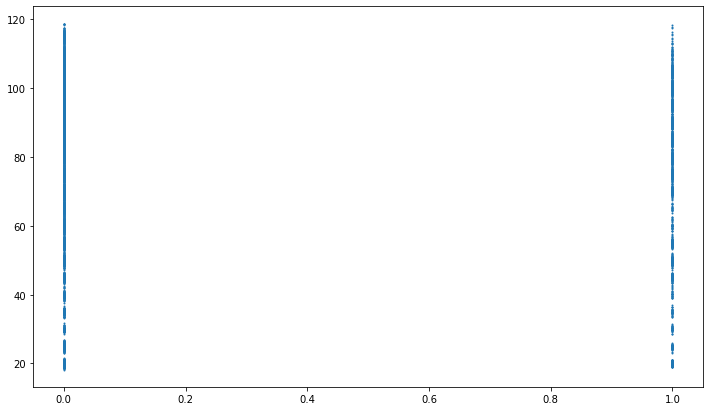

In [35]:
# this is a lovely graph that tells me nothing
plt.figure(figsize=(12,7))
x = df.churn
y = df.monthly_charges
plt.scatter(x, y, s=1)

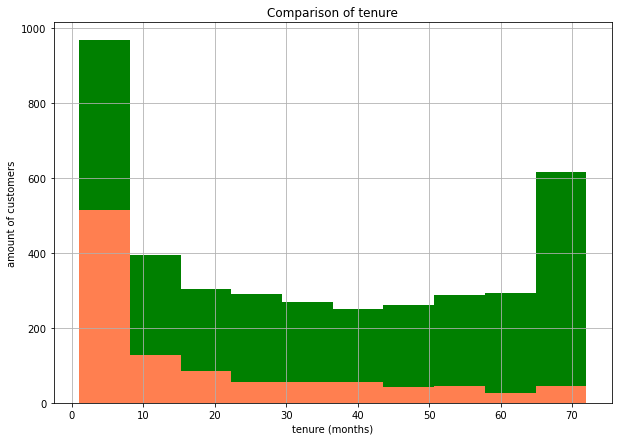

In [36]:
# A further look at comparison of tenure
plt.figure(figsize=(10,7))
train.tenure_in_months.hist(color='g')
train[train['churn']==1].tenure_in_months.hist(color='coral')
plt.xlabel('tenure (months)')
plt.ylabel('amount of customers')
plt.title('Comparison of tenure')
plt.show()

Let's further analyze associations with paperless billing and partners.

${H_0}$ : There is no association with paperless billing and customer churn\
${H_a}$ : Paperless billing does have an association to churn

In [37]:
# we set our alpha up for statistical testing
alpha = 0.05

In [38]:
train.head().T

,5399,2876,659,5843,2229
payment_type,Mailed check,Electronic check,Mailed check,Bank transfer (automatic),Bank transfer (automatic)
customer_id,0831-JNISG,1963-SVUCV,0611-DFXKO,7696-CFTAT,7916-VCCPB
senior_citizen,0,0,0,0,0
partner,1,0,1,1,1
dependents,1,0,0,1,1
tenure_in_months,71,1,20,37,16
phone_service,1,1,1,1,1
online_security,0,0,0,0,0
online_backup,0,0,0,0,1
device_protection,0,0,0,0,0


In [39]:
observed = pd.crosstab(train.churn, train.paperless_billing)
observed

paperless_billing,0,1
churn,,
0,1382,1507
1,276,772


In [40]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [41]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1382 1507]
 [ 276  772]]
---
Expected

[[1216 1672]
 [ 441  606]]
---

chi^2 = 144.9512
p     = 0.0000


In [42]:
if p < alpha:
    print('We reject the null hypothesis')
    print('We move forward with the alternate hypothesis. The two samples are associated')
else:
    print('We accept the alternate hypothesis')

We reject the null hypothesis
We move forward with the alternate hypothesis. The two samples are associated


## Next stats test

${H_0}$ : Having a partner is independent from customer churn\
${H_a}$ : Having a partner does have an association to churn

In [43]:
# another test on partners
observed = pd.crosstab(train.churn, train.partner)
observed

partner,0,1
churn,,
0,1376,1513
1,666,382


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [45]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:}')

Observed

[[1376 1513]
 [ 666  382]]
---
Expected

[[1498 1390]
 [ 543  504]]
---

chi^2 = 77.4423
p     = 1.3665799090892278e-18


In [46]:
if p < alpha:
    print('We reject the null hypothesis')
    print('We move forward with the alternate hypothesis. The two samples are associated')
else:
    print('We accept the alternate hypothesis')

We reject the null hypothesis
We move forward with the alternate hypothesis. The two samples are associated


------------------------------------------------------------------------------
${H_0}$: Mean of monthly charges of churned customers = Mean of monthly charges of all customers.\
${H_a}$: Mean of monthly charges of churned customers > Mean of monthly charges of all customers.

<AxesSubplot:>

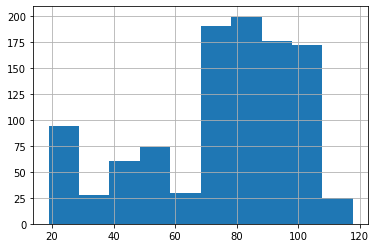

In [47]:
## maybe two a t test with 
## do some plots here then set up my test
train[train.churn==1].monthly_charges.hist()

<AxesSubplot:>

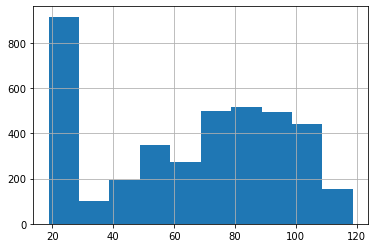

In [48]:
# overall charges
train.monthly_charges.hist()

In [49]:
# confirm sample size > 30
train.churn.value_counts()

0    2889
1    1048
Name: churn, dtype: int64

In [50]:
# calculate t and p statistic
churn_sample = df[df.churn == 1].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

t, p/2, alpha

(16.901402342895597, 4.8013198895002845e-60, 0.05)

In [51]:
if (p/2 < alpha) & (t > 0):
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


<Figure size 1152x648 with 0 Axes>

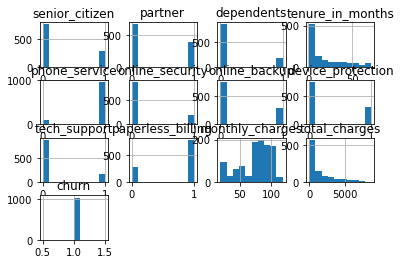

In [52]:
# an interesting mistake
plt.figure(figsize=(16,9))
train[train.churn== 1].hist()
plt.show()

In [53]:
train.sample(3).T

,2577,2596,2050
payment_type,Electronic check,Bank transfer (automatic),Electronic check
customer_id,9689-PTNPG,9776-OJUZI,7030-NJVDP
senior_citizen,0,1,0
partner,0,0,1
dependents,0,0,0
tenure_in_months,2,65,24
phone_service,1,1,1
online_security,0,0,1
online_backup,0,1,0
device_protection,0,1,0


# MODELING

### Takeaways:
- Columns with obvious correlation:
 - payment_type
 - senior_citizen
 - contract_type
 - internet_service_type
 - dependents

- Our stats tests proved:
    - paperless billing is associated
    - monthly charges is associated
    - and havin a partner is also associated

In [54]:
# keep my most valuable features on my split data and drop the rest
features = ['payment_type', 'senior_citizen', 'contract_type',
           'internet_service_type', 'dependents', 'paperless_billing',
           'monthly_charges', 'partner', 'churn']

train = train[features]
validate = validate[features]
test = test[features]

In [55]:
train.sample(3).T

,6747,157,4046
payment_type,Electronic check,Mailed check,Mailed check
senior_citizen,0,0,1
contract_type,Two year,Month-to-month,One year
internet_service_type,DSL,None,None
dependents,0,1,0
paperless_billing,1,0,0
monthly_charges,84.3,20.05,19.6
partner,1,0,1
churn,0,0,0


In [56]:
# create dummies
train = prepare.create_dummies(train)
validate = prepare.create_dummies(validate)
test = prepare.create_dummies(test)

In [57]:
train.shape, validate.shape, test.shape

((3937, 13), (1688, 13), (1407, 13))

In [58]:
train.sample(3).T

,2394,5890,6142
senior_citizen,0.00,0.0,0.0
dependents,0.00,0.0,1.0
paperless_billing,1.00,1.0,1.0
monthly_charges,74.85,25.6,114.0
partner,0.00,0.0,1.0
churn,0.00,0.0,0.0
Credit card (automatic),0.00,0.0,0.0
Electronic check,1.00,0.0,0.0
Mailed check,0.00,0.0,0.0
DSL,0.00,0.0,0.0


### Baseline Model

In [59]:
# create a baseline
train.churn.value_counts()

0    2889
1    1048
Name: churn, dtype: int64

My most common entry is 0 for not churned. So this is our positive, thus becoming the basis for our baseline.

In [60]:
train['baseline'] = 0
train.sample().T

,3473
senior_citizen,0.00
dependents,0.00
paperless_billing,1.00
monthly_charges,43.85
partner,0.00
churn,0.00
Credit card (automatic),0.00
Electronic check,0.00
Mailed check,0.00
DSL,1.00


In [61]:
# create a classification report for our baseline model
print(classification_report(train.churn, train.baseline))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      2889
           1       0.00      0.00      0.00      1048

    accuracy                           0.73      3937
   macro avg       0.37      0.50      0.42      3937
weighted avg       0.54      0.73      0.62      3937



So my accuracy for my baseline model is 73% if I predict no churn for every observation.

My suspicision is logistic regression is best but we will try decision tree and logreg.

In [62]:
# let's drop baseline for now since we don't need it anymore
train.drop(columns = 'baseline', inplace=True)

In [63]:
train.dtypes

senior_citizen               int64
dependents                   int64
paperless_billing            int64
monthly_charges            float64
partner                      int64
churn                        int64
Credit card (automatic)      uint8
Electronic check             uint8
Mailed check                 uint8
DSL                          uint8
Fiber optic                  uint8
One year                     uint8
Two year                     uint8
dtype: object

-----------------------------

In [64]:
# assign my x features and y target for each split dataframe
x_train = train.drop(columns = 'churn')
y_train = train.churn

x_validate = validate.drop(columns = 'churn')
y_validate = validate.churn

x_test = test.drop(columns = 'churn')
y_test = test.churn

### Model 1 (Decision Tree)

In [65]:
# now we're ready to train some models!
dt1 = DecisionTreeClassifier(max_depth=4, random_state=123)
dt1 = dt1.fit(x_train, y_train)

In [66]:
# model's prediction for each observation
y_pred = dt1.predict(x_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [67]:
# the percentage of each observation no churn versus churn
y_pred_proba = dt1.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.99550898, 0.00449102],
       [0.61565836, 0.38434164],
       [0.53663793, 0.46336207],
       [0.99550898, 0.00449102],
       [0.53663793, 0.46336207]])

In [68]:
# evaluate the model
print('Accuracy of Decision Tree classifier Model 1 on training set: {:.2f}'
      .format(dt1.score(x_train, y_train)))

Accuracy of Decision Tree classifier Model 1 on training set: 0.78


In [69]:
print('Accuracy of Decision Tree classifier Model 1 on validate set: {:.2f}'
      .format(dt1.score(x_validate, y_validate)))

Accuracy of Decision Tree classifier Model 1 on validate set: 0.78


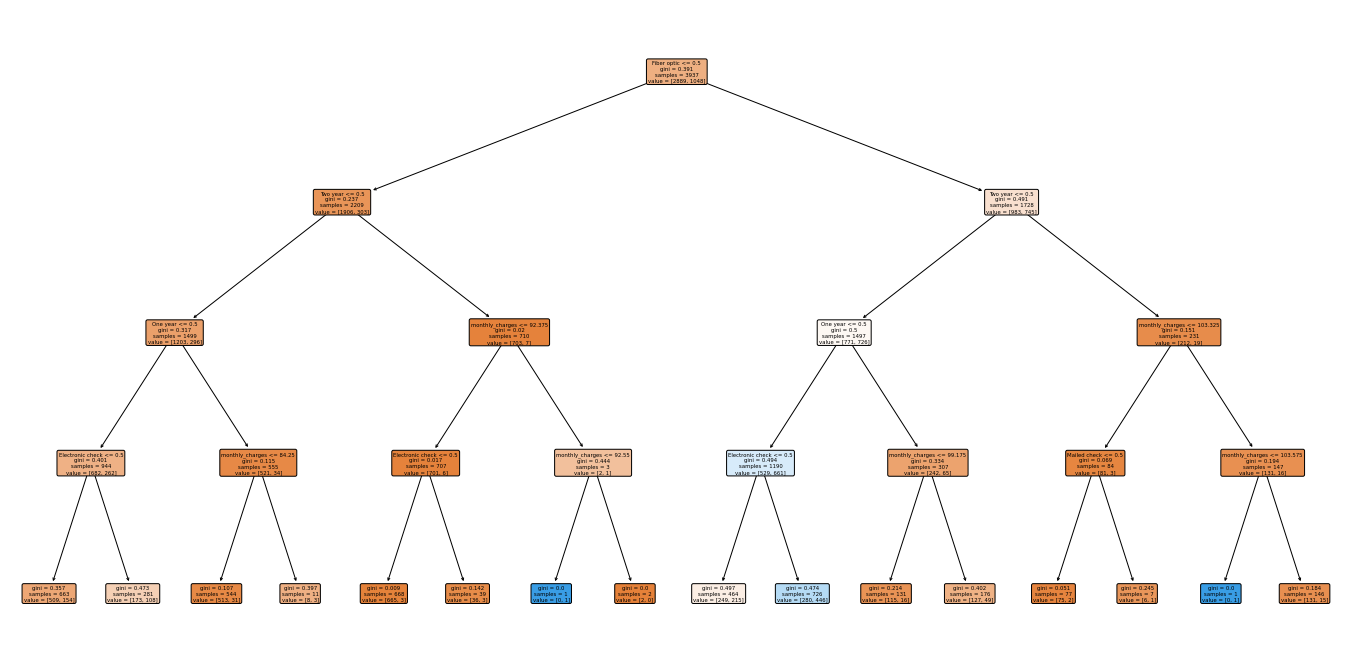

In [70]:
plt.figure(figsize=(24, 12))
plot_tree(
    dt1,
    feature_names=x_train.columns.tolist(),
    filled=True,
    rounded=True
)
plt.show()

In [71]:
confusion_matrix(y_train, y_pred)

array([[2609,  280],
       [ 600,  448]])

In [72]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(2609, 280, 600, 448)

In [73]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 448
False Positives 280
False Negatives 600
True Negatives 2609
-------------
Accuracy is 0.7764795529591059
Recall is 0.42748091603053434
Precision is 0.6153846153846154


In [74]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      2889
           1       0.62      0.43      0.50      1048

    accuracy                           0.78      3937
   macro avg       0.71      0.67      0.68      3937
weighted avg       0.76      0.78      0.76      3937



# Model 2 (Random Forest)

In [75]:
rf1 = RandomForestClassifier(bootstrap=True,
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            max_depth=8,
                            random_state=123                           
                           )

In [76]:
rf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=123)

In [77]:
print(rf1.feature_importances_)

[0.02255949 0.02682345 0.04234376 0.24045615 0.03241726 0.01448987
 0.13438482 0.01175676 0.03555    0.14835899 0.10785512 0.18300433]


In [78]:
y_pred = rf1.predict(x_train)
y_pred[:5]

array([0, 0, 0, 0, 0])

In [79]:
y_pred_proba = rf1.predict_proba(x_train)
y_pred_proba[:5]

array([[0.99257362, 0.00742638],
       [0.55102057, 0.44897943],
       [0.54937243, 0.45062757],
       [0.99262447, 0.00737553],
       [0.70925319, 0.29074681]])

In [80]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf1.score(x_train, y_train)))
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf1.score(x_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.81
Accuracy of random forest classifier on validate set: 0.79


In [81]:
print(confusion_matrix(y_train, y_pred))

[[2628  261]
 [ 489  559]]


In [82]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(2628, 261, 489, 559)

In [83]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 559
False Positives 261
False Negatives 489
True Negatives 2628
-------------
Accuracy is 0.809499618999238
Recall is 0.5333969465648855
Precision is 0.6817073170731708


In [84]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      2889
           1       0.68      0.53      0.60      1048

    accuracy                           0.81      3937
   macro avg       0.76      0.72      0.74      3937
weighted avg       0.80      0.81      0.80      3937



# Model 3 (Logistic Regression)
 - Should have done this first!

In [85]:
logit1 = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123, intercept_scaling=1, solver='lbfgs')

In [86]:
logit1.fit(x_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [87]:
print('Coefficient: \n', logit1.coef_)
print('Intercept: \n', logit1.intercept_)

Coefficient: 
 [[ 0.13207726 -0.1411453   0.18887178  0.003429   -0.08101282  0.0913467
   0.63571077  0.05402427  0.52845781  1.46095681 -1.60048227 -3.08137579]]
Intercept: 
 [2.72629136]


In [88]:
# predictions
y_pred = logit1.predict(x_train)
y_pred[:5]

array([0, 1, 1, 0, 1])

In [89]:
# estimate probability
y_pred_proba = logit1.predict_proba(x_train)
y_pred_proba[:5]

array([[0.61190433, 0.38809567],
       [0.01719497, 0.98280503],
       [0.00943067, 0.99056933],
       [0.62465369, 0.37534631],
       [0.01453915, 0.98546085]])

In [90]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit1.score(x_validate, y_validate)))

Accuracy of Logistic Regression classifier on training set: 0.35
Accuracy of Logistic Regression classifier on validate set: 0.35


In [91]:
print(confusion_matrix(y_train, y_pred))

[[ 325 2564]
 [   1 1047]]


In [92]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(325, 2564, 1, 1047)

In [93]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 1047
False Positives 2564
False Negatives 1
True Negatives 325
-------------
Accuracy is 0.34848869697739393
Recall is 0.9990458015267175
Precision is 0.2899473829963999


In [94]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.11      0.20      2889
           1       0.29      1.00      0.45      1048

    accuracy                           0.35      3937
   macro avg       0.64      0.56      0.33      3937
weighted avg       0.81      0.35      0.27      3937



### Model 2 Random Forest is best model with 81% overall accuracy.

In [95]:
# test our model
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf1.score(x_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.75


### We're in the money!!